# Problem statement = " Predict Default Index  i.e whether to give Loan or Not ."

In [1]:
#   Libraries Used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC  
svc=SVC()
from sklearn.naive_bayes import MultinomialNB 
nb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from xgboost import XGBClassifier
xg=XGBClassifier()
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
smote=SMOTE()
from imblearn.under_sampling import NearMiss
nm=NearMiss()
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  CONTENT
# divide data into 2 churns i.e train-data and test-data
#1. cleaning on both train and test data
#2. All models on data Except KNN
#3. class imbalance treatment -Random unersampling,Randomoversampling , , imblearn oversampling ,SMOTE , Near miss
#4. Feature Selection Techniques -Recursive feature elimination,Chi-Square,Boruta
#5. All Model using class imbalanced technique ( Random Undersampling ) + EDA
#6. EDA on Train data

In [3]:
dataset=pd.read_table(r"C:\Users\Mansi\Downloads\XYZCorp_LendingData11111.txt",low_memory=False,delimiter="\t",header =0)
#dataset

In [4]:
#divide the data into 2 churns i.e train and test part

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [4]:
#train dataset
data_tr=dataset.iloc[0:455968,0:]

In [7]:
#data_tr

In [8]:
data_tr.pymnt_plan.value_counts()

n    455964
y         4
Name: pymnt_plan, dtype: int64

In [9]:
data_tr.shape


(455968, 73)

In [10]:
#data.head()

In [11]:
data_tr.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [12]:
data_tr[data_tr.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind


In [13]:
data_tr[data_tr.duplicated()].shape

(0, 73)

In [14]:
data_tr.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
455963    False
455964    False
455965    False
455966    False
455967    False
Length: 455968, dtype: bool

In [15]:
#data_tr.drop_duplicates(inplace=True)

In [16]:
data_tr.shape

(455968, 73)

In [17]:
#data_tr.tail()

In [18]:
#Target column =  default_ind 
target_column=data_tr["default_ind"]
target_column

0         0
1         1
2         0
3         0
4         0
         ..
455963    0
455964    0
455965    0
455966    0
455967    0
Name: default_ind, Length: 455968, dtype: int64

In [19]:
data_tr.default_ind.value_counts()

0    412661
1     43307
Name: default_ind, dtype: int64

In [20]:
# Target column is Categorical in nature so we go with classification model

In [21]:
data_tr.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

#Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'title', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [22]:
#data_tr.loan_amnt.value_counts()#numerical 

In [23]:
#data_tr.term.value_counts()#categorical

In [24]:
#data_tr.funded_amnt.value_counts()#numerical

In [25]:
#data_tr.funded_amnt_inv.value_counts()#numerical

In [26]:
#data_tr.int_rate.value_counts()#numerical

In [27]:
#data_tr.installment.value_counts()#numrical

In [28]:
#data_tr.emp_title.value_counts()#categorical

In [29]:
#data_tr["emp_title"]

In [30]:
#data_tr.emp_length.value_counts()#categorical

In [31]:
#data_tr.home_ownership.value_counts()#categorical

In [32]:
#data_tr.annual_inc.value_counts()#numrical

In [33]:
#data_tr.verification_status.value_counts()#categorical

In [34]:
#data_tr.pymnt_plan.value_counts()#categorical

In [35]:
#data_tr.title.value_counts()#categorical

In [36]:
#data_tr.dti.value_counts()#numerical

In [37]:
#data_tr.delinq_2yrs.value_counts()#numerical

In [38]:
#data_tr.earliest_cr_line.value_counts()#categorical

In [39]:
#data_tr.inq_last_6mths.value_counts()#numerical

In [40]:
#data_tr.open_acc.value_counts()#numerical

In [41]:
#data_tr.pub_rec.value_counts()#numerical 

In [42]:
#data_tr.revol_bal.value_counts()#numerical

In [43]:
#data_tr.revol_util.value_counts()#num

In [44]:
#data_tr.total_acc.value_counts()#num

In [45]:
#data_tr.initial_list_status.value_counts()#categorical

In [46]:
#data_tr.out_prncp.value_counts()#numerical

In [47]:
#data_tr.out_prncp_inv.value_counts()#num

In [48]:
#data_tr.total_pymnt.value_counts()#um

In [49]:
#data_tr.total_pymnt_inv.value_counts()#num

In [50]:
#data_tr.total_rec_prncp.value_counts()#num

In [51]:
#data_tr.total_rec_int.value_counts()#num

In [52]:
#data_tr.total_rec_late_fee.value_counts()#num

In [53]:
#data_tr.recoveries.value_counts()#num

In [54]:
#data_tr.collection_recovery_fee.value_counts()#num

In [55]:
#data_tr.last_pymnt_d.value_counts()#catgorical

In [56]:
#data_tr.last_pymnt_amnt.value_counts()#num

In [57]:
#data_tr.next_pymnt_d.value_counts()#cat

In [58]:
#data_tr.last_credit_pull_d.value_counts()#catgorical

In [59]:
#data_tr.application_type.value_counts()#catgorical

In [60]:
#data_tr.acc_now_delinq.value_counts()#num

In [61]:
#data_tr.tot_coll_amt.value_counts()#num

In [62]:
#data_tr.tot_cur_bal.value_counts()#num

In [63]:
#data_tr.total_rev_hi_lim.value_counts()#num

In [64]:
#data_tr.total_rec_late_fee.value_counts()   #this column has only 1 unique value so drop this column.

In [65]:
#data_tr.default_ind.value_counts()#categorical

# step 1 = Missing value treatment

In [66]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455968 entries, 0 to 455967
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           455968 non-null  int64  
 1   member_id                    455968 non-null  int64  
 2   loan_amnt                    455968 non-null  float64
 3   funded_amnt                  455968 non-null  float64
 4   funded_amnt_inv              455968 non-null  float64
 5   term                         455968 non-null  object 
 6   int_rate                     455968 non-null  float64
 7   installment                  455968 non-null  float64
 8   grade                        455968 non-null  object 
 9   sub_grade                    455968 non-null  object 
 10  emp_title                    429067 non-null  object 
 11  emp_length                   435404 non-null  object 
 12  home_ownership               455968 non-null  object 
 13 

In [67]:
#delete more than 50% null values+id columns 

In [5]:
data1=data_tr.drop(["desc","verification_status_joint","verification_status_joint","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m","dti_joint","policy_code","collections_12_mths_ex_med","issue_d","purpose","zip_code","addr_state","grade","policy_code","sub_grade","mths_since_last_delinq","mths_since_last_record","mths_since_last_major_derog","annual_inc_joint","total_rec_late_fee"],axis=1,inplace=True)

In [69]:
data_tr.shape

(455968, 43)

In [70]:
#data_tr

In [71]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455968 entries, 0 to 455967
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       455968 non-null  int64  
 1   member_id                455968 non-null  int64  
 2   loan_amnt                455968 non-null  float64
 3   funded_amnt              455968 non-null  float64
 4   funded_amnt_inv          455968 non-null  float64
 5   term                     455968 non-null  object 
 6   int_rate                 455968 non-null  float64
 7   installment              455968 non-null  float64
 8   emp_title                429067 non-null  object 
 9   emp_length               435404 non-null  object 
 10  home_ownership           455968 non-null  object 
 11  annual_inc               455968 non-null  float64
 12  verification_status      455968 non-null  object 
 13  pymnt_plan               455968 non-null  object 
 14  titl

In [72]:
#data_tr.total_rev_hi_lim

In [73]:
#data_tr.total_rev_hi_lim.value_counts()#Numeical column

In [74]:
#data_tr.total_rev_hi_lim.mode()

In [75]:
#data_tr["emp_title"]

In [76]:
#data_tr.emp_title.value_counts()#categorical


In [77]:
#data_tr.emp_title.mode()

In [78]:
#data_tr["emp_length"]

In [79]:
#data_tr.emp_length.value_counts()#categorical column

In [80]:
#data_tr.emp_title.mode()

In [81]:
#data_tr["title"]

In [82]:
#data_tr.title.value_counts()#categorical

In [83]:
#data_tr.title.mode()

In [84]:
#data_tr["last_pymnt_d"]

In [85]:
#data_tr.last_pymnt_d.value_counts()#categorical

In [86]:
#data_tr.last_pymnt_d.mode()

In [87]:
#data_tr["next_pymnt_d"]

In [88]:
#data_tr.next_pymnt_d.value_counts()#categorical

In [89]:
data_tr.next_pymnt_d.mode()

0    Feb-2016
dtype: object

In [90]:
#data_tr["tot_coll_amt"]#having all 0 content#

In [91]:
#data_tr.tot_coll_amt.value_counts()#Numerical

In [92]:
data_tr.tot_coll_amt.mean()

192.56839098943794

In [93]:
#data_tr["tot_cur_bal"]

In [94]:
#data_tr.tot_cur_bal.value_counts()#Numerical

In [95]:
#data_tr["last_credit_pull_d"]

In [96]:
#data_tr.last_credit_pull_d.value_counts()#categorical

In [97]:
data_tr.last_credit_pull_d.mode()

0    Jan-2016
dtype: object

In [98]:
#data_tr.loan_amnt.head(45)

In [99]:
#categorical dcolumns for treat=emp_title,emp_lenght,last_pymnt_d,next_pymnt_d,tot_cur_bal,last_credit_pull_d,collections_12_mths_ex_med

In [100]:
#numerical columns for treat=total_rev_hi_lim,mths_since_last_delinq,revol_util,tot_coll_amt,

In [6]:
#missing value treatment for categorical columns
data_tr.title=data_tr.title.fillna("Debt consolidation")
data_tr.emp_title=data_tr.emp_title.fillna("Ryder")
data_tr.emp_length=data_tr.emp_length.fillna("1 year")
data_tr.next_pymnt_d=data_tr.next_pymnt_d.fillna("Feb-2016")
data_tr.last_pymnt_d=data_tr.last_pymnt_d.fillna("Jan-2016")
data_tr.last_credit_pull_d=data_tr.last_credit_pull_d.fillna("Jan-2016")

In [7]:
#missing value treatment for numerial columns
data_tr.total_rev_hi_lim=data_tr.total_rev_hi_lim.fillna(data_tr.total_rev_hi_lim.mean())
data_tr.revol_util=data_tr.revol_util.fillna(data_tr.revol_util.mean())
data_tr.tot_coll_amt=data_tr.tot_coll_amt.fillna(data_tr.tot_coll_amt.mean())
data_tr.tot_cur_bal=data_tr.tot_cur_bal.fillna(data_tr.tot_cur_bal.mean())

In [103]:
#data.isnull().sum()

In [104]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455968 entries, 0 to 455967
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       455968 non-null  int64  
 1   member_id                455968 non-null  int64  
 2   loan_amnt                455968 non-null  float64
 3   funded_amnt              455968 non-null  float64
 4   funded_amnt_inv          455968 non-null  float64
 5   term                     455968 non-null  object 
 6   int_rate                 455968 non-null  float64
 7   installment              455968 non-null  float64
 8   emp_title                455968 non-null  object 
 9   emp_length               455968 non-null  object 
 10  home_ownership           455968 non-null  object 
 11  annual_inc               455968 non-null  float64
 12  verification_status      455968 non-null  object 
 13  pymnt_plan               455968 non-null  object 
 14  titl

In [105]:
data_tr.shape

(455968, 43)

In [106]:
#Converting categorical values into numerical(using LableEncoder)

In [107]:
#data_tr.isnull().sum()

In [108]:
#data_tr.info()

# STEP 2 = Dtype conversion(convert categorical to numerical columns)

In [8]:

data_tr.term=le.fit_transform(data_tr.term)
data_tr.emp_title=le.fit_transform(data_tr.emp_title)
data_tr.emp_length=le.fit_transform(data_tr.emp_length)
data_tr.home_ownership=le.fit_transform(data_tr.home_ownership)
data_tr.verification_status=le.fit_transform(data_tr.verification_status)
data_tr.pymnt_plan=le.fit_transform(data_tr.pymnt_plan)
data_tr.title=le.fit_transform(data_tr.title)
data_tr.earliest_cr_line=le.fit_transform(data_tr.earliest_cr_line)
data_tr.initial_list_status=le.fit_transform(data_tr.initial_list_status)
data_tr.last_pymnt_d=le.fit_transform(data_tr.last_pymnt_d)
data_tr.next_pymnt_d=le.fit_transform(data_tr.next_pymnt_d)
data_tr.last_credit_pull_d=le.fit_transform(data_tr.last_credit_pull_d)
data_tr.application_type=le.fit_transform(data_tr.application_type)
data_tr.tot_coll_amt=le.fit_transform(data_tr.tot_coll_amt)
data_tr.tot_cur_bal=le.fit_transform(data_tr.tot_cur_bal)
data_tr.total_rev_hi_lim=le.fit_transform(data_tr.total_rev_hi_lim)

In [110]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455968 entries, 0 to 455967
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       455968 non-null  int64  
 1   member_id                455968 non-null  int64  
 2   loan_amnt                455968 non-null  float64
 3   funded_amnt              455968 non-null  float64
 4   funded_amnt_inv          455968 non-null  float64
 5   term                     455968 non-null  int32  
 6   int_rate                 455968 non-null  float64
 7   installment              455968 non-null  float64
 8   emp_title                455968 non-null  int32  
 9   emp_length               455968 non-null  int32  
 10  home_ownership           455968 non-null  int32  
 11  annual_inc               455968 non-null  float64
 12  verification_status      455968 non-null  int32  
 13  pymnt_plan               455968 non-null  int32  
 14  titl

In [111]:
#at this stage data is cleaned and numeric in nature

In [112]:
data_tr.shape

(455968, 43)

# read test data

In [10]:
data_te=dataset.iloc[455968:,:]
#data_te

In [114]:
data_te.shape

(400001, 73)

In [115]:
#data_te.head()

In [116]:
data_te.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [117]:
data_te[data_te.duplicated()]#no duplicates

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind


In [118]:
data_te[data_te.duplicated()].shape

(0, 73)

In [119]:
#Target column =  default_ind 
target_column=data_te["default_ind"]
target_column

455968    0
455969    0
455970    0
455971    0
455972    0
         ..
855964    0
855965    0
855966    0
855967    0
855968    0
Name: default_ind, Length: 400001, dtype: int64

In [120]:
data_te.default_ind.value_counts()

0    396841
1      3160
Name: default_ind, dtype: int64

# step 1 = Missing value treatment

In [121]:
data_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400001 entries, 455968 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           400001 non-null  int64  
 1   member_id                    400001 non-null  int64  
 2   loan_amnt                    400001 non-null  float64
 3   funded_amnt                  400001 non-null  float64
 4   funded_amnt_inv              400001 non-null  float64
 5   term                         400001 non-null  object 
 6   int_rate                     400001 non-null  float64
 7   installment                  400001 non-null  float64
 8   grade                        400001 non-null  object 
 9   sub_grade                    400001 non-null  object 
 10  emp_title                    377459 non-null  object 
 11  emp_length                   377504 non-null  object 
 12  home_ownership               400001 non-null  object 

In [122]:
#delete more than 50% null values+id columns 

In [11]:
data2=data_te.drop(["desc","verification_status_joint","verification_status_joint","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m","dti_joint","policy_code","collections_12_mths_ex_med","issue_d","purpose","zip_code","addr_state","grade","policy_code","sub_grade","mths_since_last_delinq","mths_since_last_record","mths_since_last_major_derog","annual_inc_joint","default_ind","total_rec_late_fee"],axis=1,inplace=True)

In [124]:
#data_te

In [125]:
data_tr.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
title                      0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amn

In [12]:
#missing value treatment for categorical columns
data_te.title=data_te.title.fillna("Debt consolidation")
data_te.emp_title=data_te.emp_title.fillna("Ryder")
data_te.emp_length=data_te.emp_length.fillna("1 year")
data_te.next_pymnt_d=data_te.next_pymnt_d.fillna("Feb-2016")
data_te.last_pymnt_d=data_te.last_pymnt_d.fillna("Jan-2016")
data_te.last_credit_pull_d=data_te.last_credit_pull_d.fillna("Jan-2016")

In [13]:
#missing value treatment for numerial columns
data_te.total_rev_hi_lim=data_te.total_rev_hi_lim.fillna(data_te.total_rev_hi_lim.mean())
data_te.revol_util=data_te.revol_util.fillna(data_te.revol_util.mean())
data_te.tot_coll_amt=data_te.tot_coll_amt.fillna(data_te.tot_coll_amt.mean())
data_te.tot_cur_bal=data_te.tot_cur_bal.fillna(data_te.tot_cur_bal.mean())

# STEP 2 = Transformation(convert categorical to numerical columns)

In [14]:
data_te.term=le.fit_transform(data_te.term)
data_te.emp_title=le.fit_transform(data_te.emp_title)
data_te.emp_length=le.fit_transform(data_te.emp_length)
data_te.home_ownership=le.fit_transform(data_te.home_ownership)
data_te.verification_status=le.fit_transform(data_te.verification_status)
data_te.pymnt_plan=le.fit_transform(data_te.pymnt_plan)
data_te.title=le.fit_transform(data_te.title)
data_te.earliest_cr_line=le.fit_transform(data_te.earliest_cr_line)
data_te.initial_list_status=le.fit_transform(data_te.initial_list_status)
data_te.last_pymnt_d=le.fit_transform(data_te.last_pymnt_d)
data_te.next_pymnt_d=le.fit_transform(data_te.next_pymnt_d)
data_te.last_credit_pull_d=le.fit_transform(data_te.last_credit_pull_d)
data_te.application_type=le.fit_transform(data_te.application_type)
data_te.tot_coll_amt=le.fit_transform(data_te.tot_coll_amt)
data_te.tot_cur_bal=le.fit_transform(data_te.tot_cur_bal)
data_te.total_rev_hi_lim=le.fit_transform(data_te.total_rev_hi_lim)

In [129]:
#samplling

In [130]:
data_tr.shape

(455968, 43)

In [131]:
data_te.shape

(400001, 42)

In [132]:
data_tr.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,0,10.65,162.87,129170,1,...,39,171.62,0,41,0,0.0,182,98879,5096,0
1,1077430,1314167,2500.0,2500.0,2500.0,1,15.27,59.83,129170,10,...,5,119.66,0,99,0,0.0,182,98879,5096,1
2,1077175,1313524,2400.0,2400.0,2400.0,0,15.96,84.33,129170,1,...,55,649.91,0,41,0,0.0,182,98879,5096,0
3,1076863,1277178,10000.0,10000.0,10000.0,0,13.49,339.31,2193,1,...,39,357.48,0,40,0,0.0,182,98879,5096,0
4,1075358,1311748,3000.0,3000.0,3000.0,1,12.69,67.79,162500,0,...,40,67.79,0,41,0,0.0,182,98879,5096,0


In [133]:
data_te.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
455968,67888135,72746849,13850.0,13850.0,13850.0,0,18.49,504.13,54276,6,...,0.0,5,0.00,0,6,0,0.0,0,30174,1569
455969,67828417,72687137,17500.0,17500.0,17500.0,0,7.26,542.44,26662,3,...,0.0,5,0.00,0,6,0,0.0,0,160390,3967
455970,67888396,72747115,5000.0,5000.0,5000.0,0,11.99,166.05,61933,10,...,0.0,5,0.00,0,6,0,0.0,1165,42696,268
455971,68028393,72887109,35000.0,35000.0,34850.0,1,18.49,898.13,1078,1,...,0.0,2,35059.33,0,3,0,0.0,0,169773,4265
455972,67888464,72747185,10500.0,10500.0,10450.0,1,19.99,278.13,108615,5,...,0.0,5,0.00,0,6,0,0.0,0,27167,99


In [15]:
tr_x=data_tr.iloc[:,2:-1]
tr_y=data_tr.iloc[:,-1]
te_x=data_te.iloc[:,2:]

In [135]:
#tr_x.head()

In [136]:
#data_tr.default_ind.isna().sum()

In [137]:
#te_x.head()

In [16]:
tr_x.shape,tr_y.shape,te_x.shape

((455968, 40), (455968,), (400001, 40))

In [17]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [18]:
lg.fit(tr_x,tr_y)

LogisticRegression()

In [19]:
lg_p=lg.predict(te_x)
lg_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
tr_x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,129170,1,5,24000.0,...,0.00,39,171.62,0,41,0,0.0,182,98879,5096
1,2500.0,2500.0,2500.0,1,15.27,59.83,129170,10,5,30000.0,...,1.11,5,119.66,0,99,0,0.0,182,98879,5096
2,2400.0,2400.0,2400.0,0,15.96,84.33,129170,1,5,12252.0,...,0.00,55,649.91,0,41,0,0.0,182,98879,5096
3,10000.0,10000.0,10000.0,0,13.49,339.31,2193,1,5,49200.0,...,0.00,39,357.48,0,40,0,0.0,182,98879,5096
4,3000.0,3000.0,3000.0,1,12.69,67.79,162500,0,5,80000.0,...,0.00,40,67.79,0,41,0,0.0,182,98879,5096


In [21]:
df=pd.DataFrame(lg_p,columns=["default_ind"])
df


,default_ind
0,0
1,0
2,0
3,0
4,0
...,...
399996,0
399997,0
399998,0
399999,0


In [22]:
d1=pd.DataFrame(data_te.iloc[:,0])
d2=d1.reset_index(drop=True)
d2

,id
0,67888135
1,67828417
2,67888396
3,68028393
4,67888464
...,...
399996,36371250
399997,36441262
399998,36271333
399999,36490806


In [23]:
d1.shape

(400001, 1)

In [24]:
result=pd.concat([d2,df],axis=1)
result

,id,default_ind
0,67888135,0
1,67828417,0
2,67888396,0
3,68028393,0
4,67888464,0
...,...,...
399996,36371250,0
399997,36441262,0
399998,36271333,0
399999,36490806,0


In [147]:
result.shape

(400001, 2)

# Model on Training data to check performance

In [148]:
#samplling

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(tr_x,tr_y,test_size=0.3,random_state=100)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((319177, 40), (136791, 40), (319177,), (136791,))

# Machine learning- Base Model

# Logistic Regression

In [152]:
lg.fit(x_train,y_train)

LogisticRegression()

In [153]:
lg_p3=lg.predict(x_test)
lg_p3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
c2=confusion_matrix(lg_p3,y_test)
c2

array([[123842,    544],
       [    22,  12383]], dtype=int64)

In [155]:
Ac2=c2.diagonal().sum()/c2.sum()*100  #99 % accuracy
Ac2

99.5862300882368

In [156]:
print(classification_report(lg_p3,y_test)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124386
           1       0.96      1.00      0.98     12405

    accuracy                           1.00    136791
   macro avg       0.98      1.00      0.99    136791
weighted avg       1.00      1.00      1.00    136791



# Decision Tree

In [158]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [159]:
dt_p4=dt.predict(x_test)
dt_p4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
c3=confusion_matrix(dt_p4,y_test)
c3

array([[123792,     88],
       [    72,  12839]], dtype=int64)

In [161]:
Ac3=c3.diagonal().sum()/c3.sum()*100  #99 % accuracy
Ac3

99.88303324049097

In [162]:
print(classification_report(dt_p4,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123880
           1       0.99      0.99      0.99     12911

    accuracy                           1.00    136791
   macro avg       1.00      1.00      1.00    136791
weighted avg       1.00      1.00      1.00    136791



# Naive Bayes

In [23]:
nb.fit(x_train,y_train)

MultinomialNB()

In [24]:
nb_p3=nb.predict(x_test)
nb_p3

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [25]:
c5=confusion_matrix(nb_p3,y_test)
c5

array([[98544,   799],
       [25320, 12128]], dtype=int64)

In [26]:
Ac5=c5.diagonal().sum()/c5.sum()*100
Ac5

80.90590755239745

In [27]:
print(classification_report(nb_p3,y_test))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     99343
           1       0.94      0.32      0.48     37448

    accuracy                           0.81    136791
   macro avg       0.87      0.66      0.68    136791
weighted avg       0.83      0.81      0.77    136791



# Random Forest

In [34]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
rf_pred=rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
m_rf=confusion_matrix(rf_pred,y_test)
m_rf

array([[123863,    151],
       [     1,  12776]], dtype=int64)

In [37]:
acc_rf=m_rf.diagonal().sum()/m_rf.sum()*100 #99% accuracy
acc_rf

99.88888157846641

In [38]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124014
           1       0.99      1.00      0.99     12777

    accuracy                           1.00    136791
   macro avg       0.99      1.00      1.00    136791
weighted avg       1.00      1.00      1.00    136791



# Boosting

In [ ]:
#XG Boost

In [39]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
xg_pred=xg.predict(x_test)
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
m6=confusion_matrix(xg_pred,y_test)
m6

array([[123864,     65],
       [     0,  12862]], dtype=int64)

In [42]:
acc_xg=m6.diagonal().sum()/m6.sum()*100
acc_xg

99.95248225394946

In [ ]:
print(classification_report(xg_pred,y_test))

In [ ]:
#from base model accuracy 
# 1.  Logistic Regression = 98%  accuracy
# 2.  Decision tree = 99% 
# 3.  Naive Bayes = 86% accuracy = 80% accuracy
# 4.  Random Forest = 99%accuracy

# class imbalanced technique

#   Random undersamplling

In [ ]:
#data is large so go with random undersamplling

In [28]:
c_2,c_3=data_tr["default_ind"].value_counts()
c_2,c_3

(412661, 43307)

In [29]:
train_2=data_tr[data_tr["default_ind"]==0]
train_3=data_tr[data_tr["default_ind"]==1]
train_2.shape,train_3.shape

((412661, 43), (43307, 43))

In [30]:
class_new22=train_2.sample(c_3)

In [31]:
class2_f=pd.concat([class_new22,train_3],axis=0)

In [32]:
class2_f.shape


(86614, 43)

In [33]:
class2_f.default_ind.value_counts()

0    43307
1    43307
Name: default_ind, dtype: int64

In [34]:
n_x2=class2_f.iloc[:,2:-1]
n_y2=class2_f.iloc[:,-1]

In [35]:
#n_x2

In [36]:
x_train2,x_test3,y_train2,y_test3=train_test_split(n_x2,n_y2,test_size=0.2,random_state=100)


In [37]:
x_train2.shape,x_test3.shape,y_train2.shape,y_test3.shape

((69291, 40), (17323, 40), (69291,), (17323,))

# logistic regression with Random undersamplling  

In [ ]:
#lg.fit(x_train2,y_train2)

In [ ]:
#lg_f=lg.predict(x_test3)
#lg_f

In [ ]:
#c_f=confusion_matrix(lg_f,y_test3)
#c_f

In [ ]:
#Acc_f=c_f.diagonal().sum()/c_f.sum()*100
#Acc_f

In [ ]:
#print(classification_report(lg_f,y_test3))

# Decision tree with Random undersamplling         

In [ ]:
#dt.fit(x_train2,y_train2)

In [ ]:
#dt_g=dt.predict(x_test3)
#dt_g

In [ ]:
#c_g=confusion_matrix(dt_g,y_test3)
#c_g

In [ ]:
#Acc_g=c_g.diagonal().sum()/c_g.sum()*100
#Acc_g

In [ ]:
#print(classification_report(dt_g,y_test3))

# random forest with Random undersamplling           

In [ ]:
#rf.fit(x_train2,y_train2)

In [ ]:
#rf_h=rf.predict(x_test3)
#rf_h

In [ ]:
#c_h=confusion_matrix(rf_h,y_test3)
#c_h

In [ ]:
#Acc_h=c_h.diagonal().sum()/c_h.sum()*100
#Acc_h

In [ ]:
#print(classification_report(rf_h,y_test3))

# Naive bayes with Random undersamplling   

In [69]:
nb.fit(x_train2,y_train2)

MultinomialNB()

In [70]:
nb_a1=nb.predict(x_test3)
nb_a

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [71]:
c_d1=confusion_matrix(nb_a1,y_test3)
c_d

array([[65654,  5355],
       [16960, 77096]], dtype=int64)

In [72]:
Acc_d=c_d1.diagonal().sum()/c_d1.sum()*100
Acc_d

86.98262425676846

In [73]:
print(classification_report(nb_a1,y_test3))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7481
           1       0.94      0.82      0.88      9842

    accuracy                           0.87     17323
   macro avg       0.87      0.88      0.87     17323
weighted avg       0.88      0.87      0.87     17323



# Navie bayes working good

In [ ]:
#from Random Undersampling accuracy 
# 1.  Logistic Regression = 98%  accuracy
# 2.  Decision tree = 99% 
# 3.  Naive Bayes = 86% accuracy 
# 4.  Random Forest = 99%accuracy

# Feature selection Technique

#   RFE(recursive feature elimination)

In [38]:
dt=DecisionTreeClassifier()

In [39]:
rfe=RFE(dt)

In [40]:
class2_f.shape

(86614, 43)

In [41]:
rfe.fit(class2_f.iloc[:,2:-1],class2_f.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [42]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False, False,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False,  True,  True])

In [43]:
d_new1=pd.DataFrame({"feature support":list(rfe.support_),"columns":list(class2_f.iloc[:,2:-1].columns)})
d_new1

,feature support,columns
0,True,loan_amnt
1,True,funded_amnt
2,True,funded_amnt_inv
3,False,term
4,False,int_rate
5,True,installment
6,True,emp_title
7,False,emp_length
8,False,home_ownership
9,True,annual_inc


In [44]:
d_new2=d_new1.sort_index(ascending=False)
d_new2

,feature support,columns
39,True,total_rev_hi_lim
38,True,tot_cur_bal
37,False,tot_coll_amt
36,False,acc_now_delinq
35,False,application_type
34,False,last_credit_pull_d
33,False,next_pymnt_d
32,True,last_pymnt_amnt
31,True,last_pymnt_d
30,False,collection_recovery_fee


In [45]:
#drop the unrelevent columns

In [46]:
data_rfe=class2_f.drop(["term","emp_length","home_ownership","verification_status","pymnt_plan","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_util","total_acc","initial_list_status","out_prncp_inv","collection_recovery_fee","next_pymnt_d","last_credit_pull_d","application_type","acc_now_delinq","tot_coll_amt","tot_cur_bal"],axis=1)
#data_rfe

In [47]:
data_rfe.shape

(86614, 23)

In [48]:
#data_rfe

In [49]:
#splitting the data

In [50]:
x_rfe=data_rfe.iloc[:,2:-1]
y_rfe=data_rfe.iloc[:,-1]

In [51]:
#samplling

In [52]:
xrfe_train,xrfe_test,yrfe_train,yrfe_test=train_test_split(x_rfe,y_rfe,test_size=0.3,random_state=100)

In [53]:
xrfe_train.shape,xrfe_test.shape,yrfe_train.shape,yrfe_test.shape

((60629, 20), (25985, 20), (60629,), (25985,))

In [ ]:
# ML ALGORITHMS 

# logistic regression with RFE

In [ ]:
#lg.fit(xrfe_train,yrfe_train)

In [ ]:
#lg_rfe=lg.predict(xrfe_test)
#lg_rfe

In [ ]:
#c_rfe=confusion_matrix(lg_rfe,yrfe_test)
#c_rfe

In [ ]:
#Ac_rfe=c_rfe.diagonal().sum()/c_rfe.sum()*100  #99 % accuracy
#Ac_rfe

In [ ]:
#print(classification_report(lg_rfe,yrfe_test)) 

# Decision tree with RFE

In [ ]:
#dt.fit(xrfe_train,yrfe_train)

In [ ]:
#dt_rfe1=dt.predict(xrfe_test)
#dt_rfe1

In [ ]:
#c_rfe1=confusion_matrix(dt_rfe1,yrfe_test)
#c_rfe1

In [ ]:
#Acc_rfe1=c_rfe1.diagonal().sum()/c_rfe1.sum()*100
#Acc_rfe1

In [ ]:
#print(classification_report(dt_rfe1,yrfe_test))

# Random Forest with RFE

In [ ]:
#rf.fit(xrfe_train,yrfe_train)

In [ ]:
#rf_rfe2=rf.predict(xrfe_test)
#rf_rfe2

In [ ]:
#c_rfe2=confusion_matrix(rf_rfe2,yrfe_test)
#c_rfe2

In [ ]:
#Acc_rfe2=c_rfe2.diagonal().sum()/c_rfe2.sum()*100
#Acc_rfe2

In [ ]:
#print(classification_report(rf_rfe2,yrfe_test))

# Naive bayes with RFE

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
nb.fit(xrfe_train,yrfe_train)

MultinomialNB()

In [143]:
ni=nb.predict(xrfe_test)

In [144]:
n_rfe4=confusion_matrix(ni,yrfe_test)
n_rfe4

array([[10318,  1189],
       [ 2712, 11766]], dtype=int64)

In [145]:
acc_rfe4=n_rfe4.diagonal().sum()/n_rfe4.sum()*100
acc_rfe4

84.98749278429864

In [146]:
print(classification_report(ni,yrfe_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     11507
           1       0.91      0.81      0.86     14478

    accuracy                           0.85     25985
   macro avg       0.85      0.85      0.85     25985
weighted avg       0.86      0.85      0.85     25985



# EDA

In [166]:
data_rfe.shape

(86614, 23)

# outlier treatment


In [ ]:
#relevent columns from feature selction technique
#loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_title,annual_inc,title,dti,earliest_cr_line,revol_bal,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,total_rev_hi_lim

In [ ]:
#Numerical columns =loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_bal,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,total_rev_hi_lim

In [ ]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(data_rfe,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using Seaborn Method")
plt.show()

In [ ]:
#data_rfe.boxplot(figsize=(30,10))

In [ ]:
#for total_rev_hi_lim column

In [167]:
data_rfe.total_rev_hi_lim.describe()

count    86614.000000
mean      4241.556642
std       2987.044556
min          0.000000
25%       1699.000000
50%       4325.000000
75%       5360.000000
max      14463.000000
Name: total_rev_hi_lim, dtype: float64

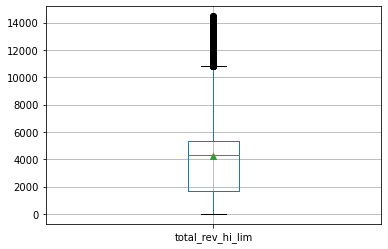

In [168]:
box1=data_rfe.boxplot(column="total_rev_hi_lim",showmeans=True)

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

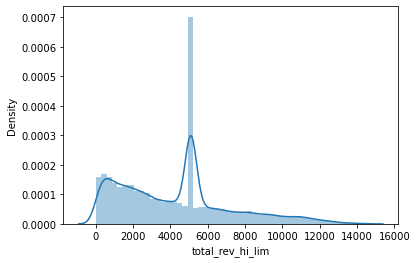

In [169]:
sns.distplot(data_rfe["total_rev_hi_lim"])

In [170]:
iqr1=data_rfe.total_rev_hi_lim.quantile(0.75)-data_rfe.total_rev_hi_lim.quantile(0.25)
iqr1

3661.0

In [171]:
u1=data_rfe["total_rev_hi_lim"].quantile(0.75)+3*iqr1
l1=data_rfe["total_rev_hi_lim"].quantile(0.25)-3*iqr1
print(u1,l1)

16343.0 -9284.0


In [172]:
data_rfe.loc[data_rfe["total_rev_hi_lim"]>16343.0,"total_rev_hi_lim"]=16343.0

<AxesSubplot:>

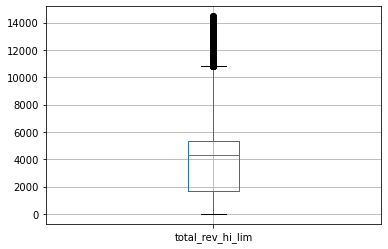

In [173]:
data_rfe.boxplot(column="total_rev_hi_lim")

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

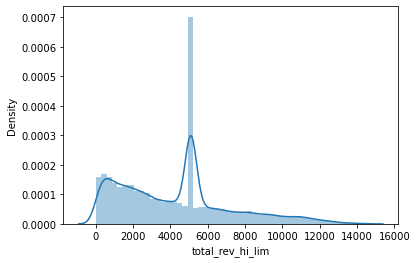

In [174]:
sns.distplot(data_rfe["total_rev_hi_lim"])

In [ ]:
# for funded_amnt column        #no outliers

In [175]:
data_rfe.funded_amnt.describe()

count    86614.000000
mean     14394.646651
std       8322.015598
min        500.000000
25%       8000.000000
50%      12250.000000
75%      20000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

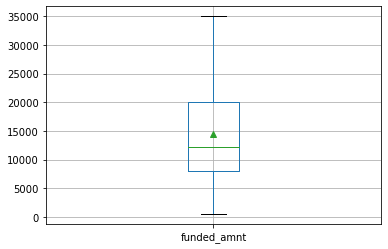

In [176]:
box2=data_rfe.boxplot(column="funded_amnt",showmeans=True)

In [ ]:
# for funded_amnt_inv   # no outliers

In [177]:
data_rfe.funded_amnt_inv.describe()

count    86614.000000
mean     14307.245325
std       8339.826862
min          0.000000
25%       8000.000000
50%      12025.000000
75%      19975.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

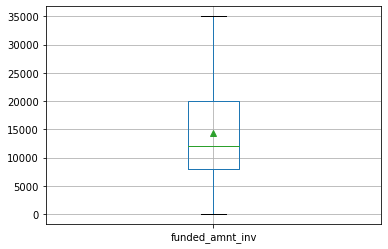

In [178]:
box3=data_rfe.boxplot(column="funded_amnt_inv",showmeans=True)

In [ ]:
#for installment

In [179]:
data_rfe.installment.describe()

count    86614.000000
mean       435.961334
std        244.842519
min         16.080000
25%        259.990000
50%        384.770000
75%        570.377500
max       1409.990000
Name: installment, dtype: float64

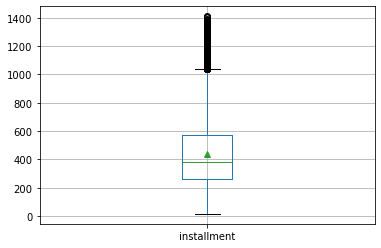

In [180]:
box4=data_rfe.boxplot(column="installment",showmeans=True)

<AxesSubplot:xlabel='installment', ylabel='Density'>

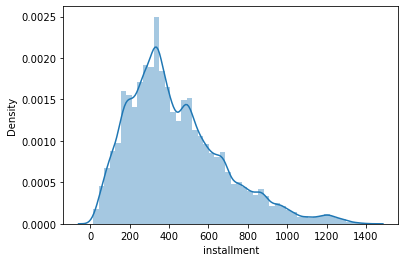

In [181]:
sns.distplot(data_rfe["installment"])

In [182]:
iqr4=data_rfe.installment.quantile(0.75)-data_rfe.installment.quantile(0.25)
iqr4

310.38750000000005

In [183]:
u4=data_rfe["installment"].quantile(0.75)+3*iqr4
l4=data_rfe["installment"].quantile(0.25)-3*iqr4
print(u4,l4)

1501.5400000000002 -671.1725000000001


In [184]:
data_rfe.loc[data_rfe["installment"]>1501.5400000000002,"installment"]=1501.5400000000002

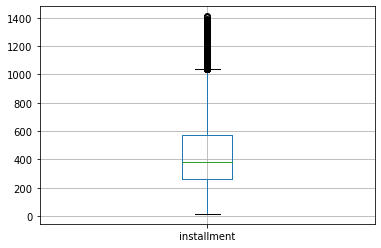

In [185]:
box4=data_rfe.boxplot(column="installment")

<AxesSubplot:xlabel='installment', ylabel='Density'>

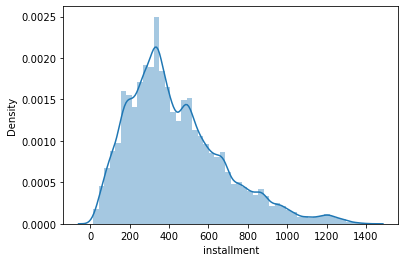

In [186]:
sns.distplot(data_rfe["installment"])

In [187]:
#for annual_inc

In [188]:
data_rfe.annual_inc.describe()

count    8.661400e+04
mean     6.973601e+04
std      5.883185e+04
min      4.000000e+03
25%      4.300000e+04
50%      6.000000e+04
75%      8.400000e+04
max      7.446395e+06
Name: annual_inc, dtype: float64

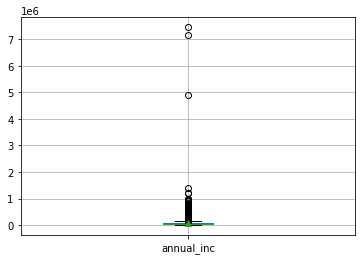

In [189]:
box5=data_rfe.boxplot(column="annual_inc",showmeans=True)

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

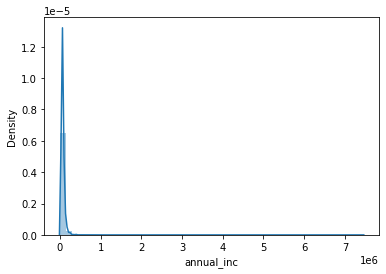

In [190]:
sns.distplot(data_rfe["annual_inc"])

In [191]:
iqr5=data_rfe.annual_inc.quantile(0.75)-data_rfe.annual_inc.quantile(0.25)
iqr5

41000.0

In [192]:
u5=data_rfe["annual_inc"].quantile(0.75)+3*iqr5
l5=data_rfe["annual_inc"].quantile(0.25)-3*iqr5
print(u5,l5)

207000.0 -80000.0


In [193]:
data_rfe.loc[data_rfe["annual_inc"]>207000.0,"annual_inc"]=207000.0

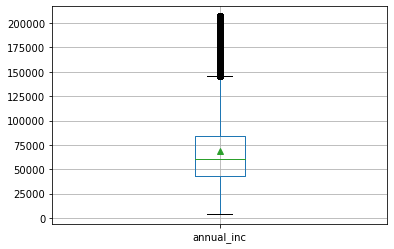

In [194]:
box5=data_rfe.boxplot(column="annual_inc",showmeans=True)

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

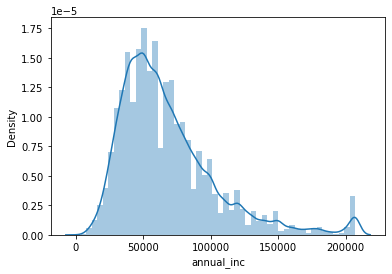

In [195]:
sns.distplot(data_rfe["annual_inc"])

In [196]:
#for dti     # no outliers

In [197]:
data_rfe.dti.describe()

count    86614.000000
mean        17.679122
std          7.875063
min          0.000000
25%         11.840000
50%         17.450000
75%         23.320000
max         39.990000
Name: dti, dtype: float64

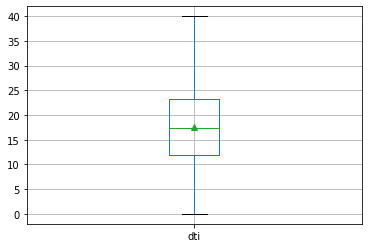

In [198]:
box6=data_rfe.boxplot(column="dti",showmeans=True)

In [ ]:
#for total_pymnt_inv

In [199]:
data_rfe.total_pymnt_inv.describe()

count    86614.000000
mean      9295.871261
std       7584.192558
min          0.000000
25%       3912.685000
50%       7196.855000
75%      12422.455000
max      55759.490000
Name: total_pymnt_inv, dtype: float64

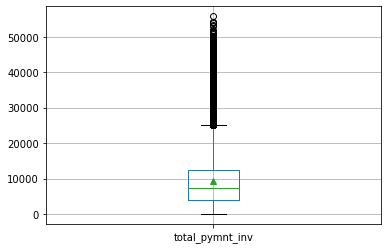

In [200]:
box7=data_rfe.boxplot(column="total_pymnt_inv",showmeans=True)

<AxesSubplot:xlabel='total_pymnt_inv', ylabel='Density'>

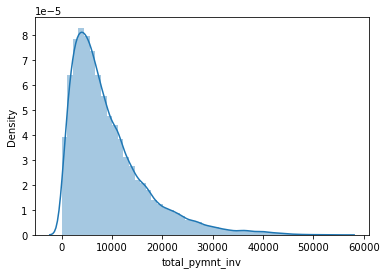

In [201]:
sns.distplot(data_rfe["total_pymnt_inv"])

In [202]:
iqr7=data_rfe.total_pymnt_inv.quantile(0.75)-data_rfe.total_pymnt_inv.quantile(0.25)
iqr7

8509.77

In [203]:
u7=data_rfe["total_pymnt_inv"].quantile(0.75)+3*iqr7
l7=data_rfe["total_pymnt_inv"].quantile(0.25)-3*iqr7
print(u7,l7)

37951.765 -21616.625


In [204]:
data_rfe.loc[data_rfe["total_pymnt_inv"]>37951.765,"total_pymnt_inv"]=37951.765

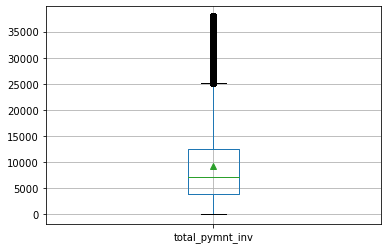

In [205]:
box7=data_rfe.boxplot(column="total_pymnt_inv",showmeans=True)

<AxesSubplot:xlabel='total_pymnt_inv', ylabel='Density'>

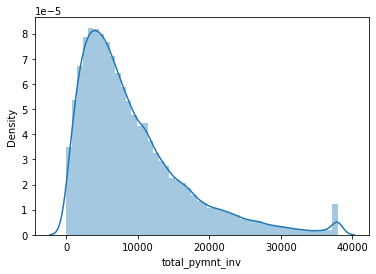

In [206]:
sns.distplot(data_rfe["total_pymnt_inv"])

In [207]:
#for total_pyment

In [208]:
data_rfe.total_pymnt.describe()

count    86614.000000
mean      9357.358094
std       7601.542318
min          0.000000
25%       3963.785000
50%       7254.450000
75%      12498.140000
max      55759.489944
Name: total_pymnt, dtype: float64

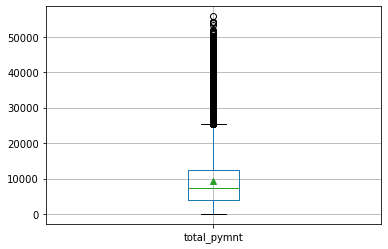

In [209]:
box8=data_rfe.boxplot(column="total_pymnt",showmeans=True)

<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

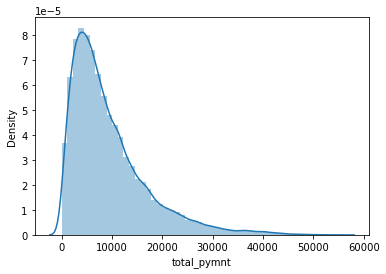

In [210]:
sns.distplot(data_rfe["total_pymnt"])

In [211]:
iqr8=data_rfe.total_pymnt.quantile(0.75)-data_rfe.total_pymnt.quantile(0.25)
iqr8

8534.355

In [212]:
u8=data_rfe["total_pymnt"].quantile(0.75)+3*iqr8
l8=data_rfe["total_pymnt"].quantile(0.25)-3*iqr8
print(u8,l8)

38101.205 -21639.28


In [213]:
data_rfe.loc[data_rfe["total_pymnt"]>38101.205,"total_pymnt"]=38101.205

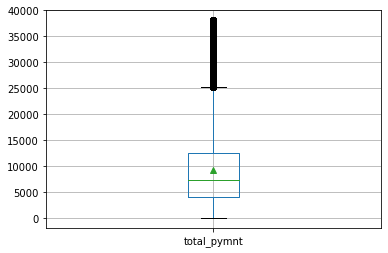

In [214]:
box8=data_rfe.boxplot(column="total_pymnt",showmeans=True)

<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

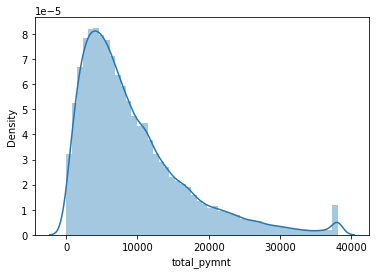

In [215]:
sns.distplot(data_rfe["total_pymnt"])

In [216]:
# for total_rec_prncp

In [217]:
data_rfe.total_rec_prncp.describe()

count    86614.000000
mean      6475.972942
std       6328.067641
min          0.000000
25%       2121.462500
50%       4414.140000
75%       8666.197500
max      35000.010000
Name: total_rec_prncp, dtype: float64

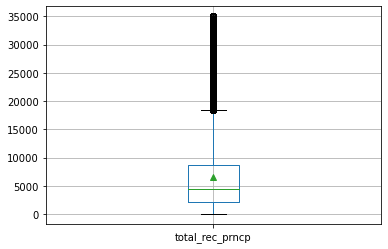

In [218]:
box9=data_rfe.boxplot(column="total_rec_prncp",showmeans=True)

<AxesSubplot:xlabel='total_rec_prncp', ylabel='Density'>

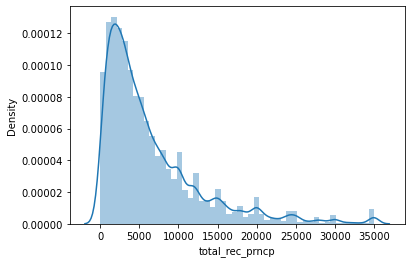

In [219]:
sns.distplot(data_rfe["total_rec_prncp"])

In [220]:
iqr9=data_rfe.total_rec_prncp.quantile(0.75)-data_rfe.total_rec_prncp.quantile(0.25)
iqr9

6544.735000000001

In [221]:
u9=data_rfe["total_rec_prncp"].quantile(0.75)+3*iqr9
l9=data_rfe["total_rec_prncp"].quantile(0.25)-3*iqr9
print(u9,l9)

28300.402500000004 -17512.7425


In [222]:
data_rfe.loc[data_rfe["total_rec_prncp"]>28300.402500000004,"total_pymnt"]=28300.402500000004

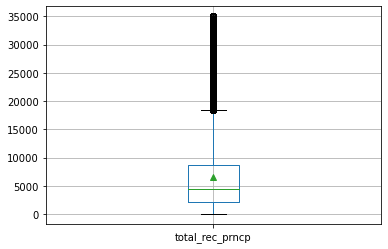

In [223]:
box9=data_rfe.boxplot(column="total_rec_prncp",showmeans=True)

<AxesSubplot:xlabel='total_rec_prncp', ylabel='Density'>

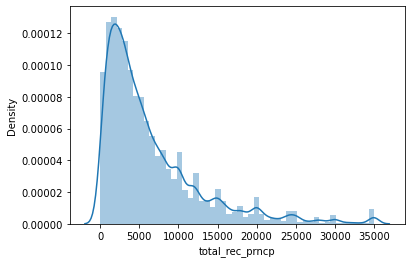

In [224]:
sns.distplot(data_rfe["total_rec_prncp"])

In [225]:
#for total_rec_int

In [226]:
data_rfe.total_rec_int.describe()

count    86614.000000
mean      2425.590479
std       2401.067006
min          0.000000
25%        846.862500
50%       1680.930000
75%       3119.370000
max      21503.130000
Name: total_rec_int, dtype: float64

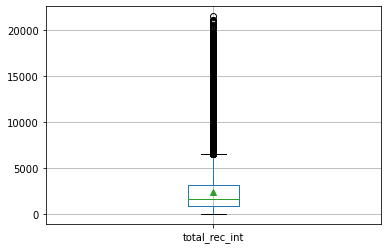

In [227]:
box10=data_rfe.boxplot(column="total_rec_int",showmeans=True)

<AxesSubplot:xlabel='total_rec_int', ylabel='Density'>

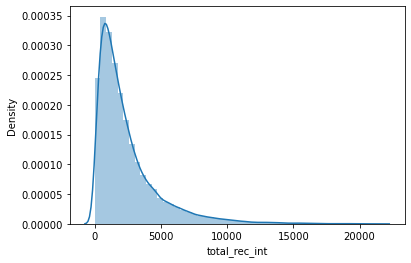

In [228]:
sns.distplot(data_rfe["total_rec_int"])

In [229]:
iqr10=data_rfe.total_rec_int.quantile(0.75)-data_rfe.total_rec_int.quantile(0.25)
iqr10

2272.5074999999997

In [230]:
u10=data_rfe["total_rec_int"].quantile(0.75)+3*iqr10
l10=data_rfe["total_rec_int"].quantile(0.25)-3*iqr10
print(u10,l10)

9936.892499999998 -5970.659999999999


In [231]:
data_rfe.loc[data_rfe["total_rec_int"]>9936.892499999998,"total_rec_int"]=9936.892499999998

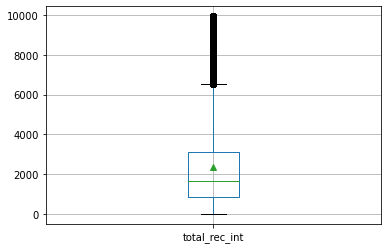

In [232]:
box10=data_rfe.boxplot(column="total_rec_int",showmeans=True)

<AxesSubplot:xlabel='total_rec_int', ylabel='Density'>

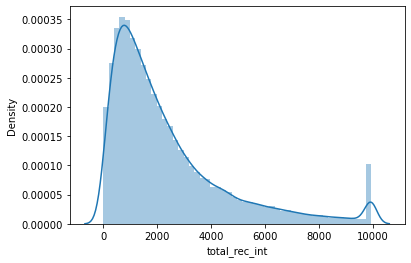

In [233]:
sns.distplot(data_rfe["total_rec_int"])

In [234]:
#for last_pymnt_amnt

In [235]:
data_rfe.last_pymnt_amnt.describe()

count    86614.000000
mean      1952.813477
std       4395.188626
min          0.000000
25%        273.780000
50%        452.890000
75%        806.092500
max      35814.330000
Name: last_pymnt_amnt, dtype: float64

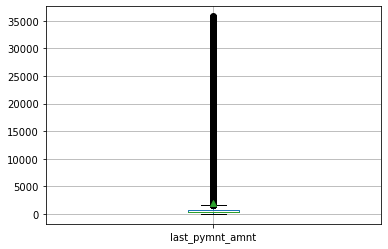

In [236]:
box12=data_rfe.boxplot(column="last_pymnt_amnt",showmeans=True)

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

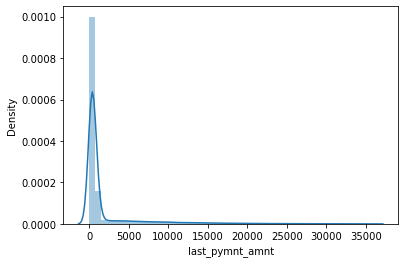

In [237]:
sns.distplot(data_rfe["last_pymnt_amnt"])

In [238]:
iqr12=data_rfe.last_pymnt_amnt.quantile(0.75)-data_rfe.last_pymnt_amnt.quantile(0.25)
iqr12

532.3125

In [239]:
u12=data_rfe["last_pymnt_amnt"].quantile(0.75)+3*iqr12
l12=data_rfe["last_pymnt_amnt"].quantile(0.25)-3*iqr12
print(u12,l12)

2403.0299999999997 -1323.1575


In [241]:
data_rfe.loc[data_rfe["last_pymnt_amnt"]>2403.0299999999997,"last_pymnt_amnt"]=2403.0299999999997

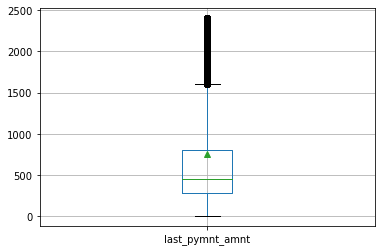

In [242]:
box12=data_rfe.boxplot(column="last_pymnt_amnt",showmeans=True)

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

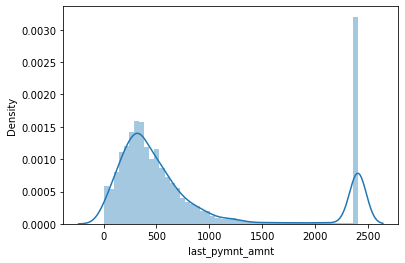

In [243]:
sns.distplot(data_rfe["last_pymnt_amnt"])

In [ ]:
#for revol_bal 

In [244]:
data_rfe.revol_bal.describe()

count    8.661400e+04
mean     1.557648e+04
std      1.773889e+04
min      0.000000e+00
25%      6.381000e+03
50%      1.160400e+04
75%      1.986575e+04
max      1.746716e+06
Name: revol_bal, dtype: float64

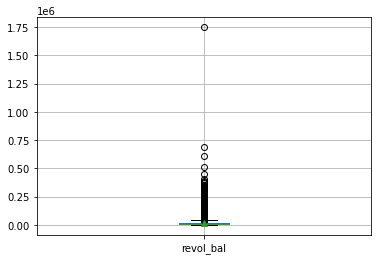

In [245]:
box13=data_rfe.boxplot(column="revol_bal",showmeans=True)

<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

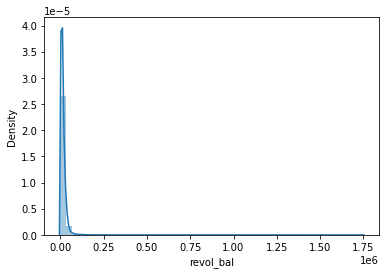

In [246]:
sns.distplot(data_rfe["revol_bal"])

In [247]:
iqr13=data_rfe.revol_bal.quantile(0.75)-data_rfe.revol_bal.quantile(0.25)
iqr13

13484.75

In [248]:
u13=data_rfe["revol_bal"].quantile(0.75)+3*iqr13
l13=data_rfe["revol_bal"].quantile(0.25)-3*iqr13
print(u13,l13)

60320.0 -34073.25


In [249]:
data_rfe.loc[data_rfe["revol_bal"]>60320.0,"revol_bal"]=60320.0

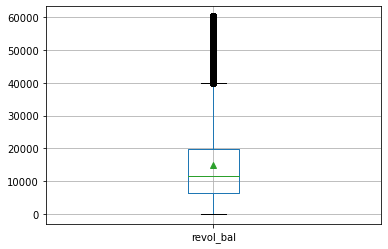

In [250]:
box13=data_rfe.boxplot(column="revol_bal",showmeans=True)

<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

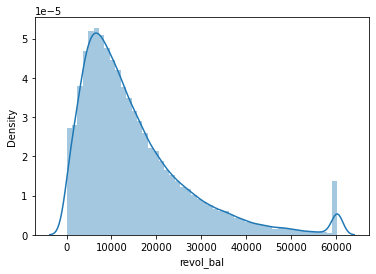

In [251]:
sns.distplot(data_rfe["revol_bal"])

In [ ]:
#for int_rate  # 

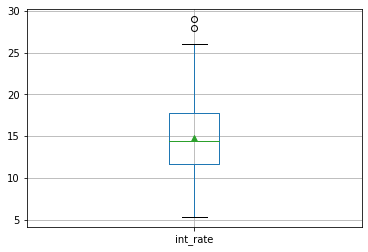

In [252]:
box14=data_rfe.boxplot(column="int_rate",showmeans=True)

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

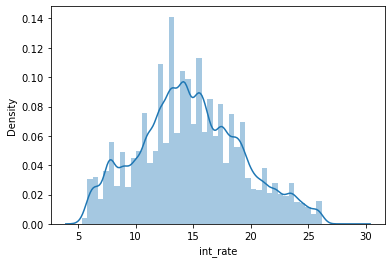

In [253]:
sns.distplot(data_rfe["int_rate"])

In [270]:
u14=data_rfe["int_rate"].mean()+3*data_rfe["int_rate"].std()
u14

28.179065113309925

In [271]:
data_rfe.loc[data_rfe["int_rate"]>28.179065113309925,"int_rate"]=28.179065113309925

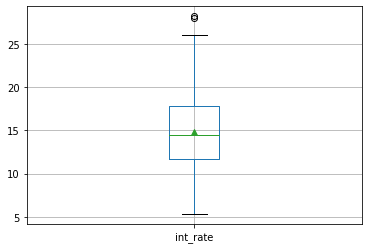

In [272]:
box14=data_rfe.boxplot(column="int_rate",showmeans=True)

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

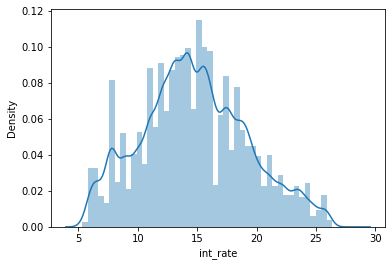

In [273]:
sns.distplot(data_rfe["int_rate"])

In [ ]:
# for loan_amnt    # no outliers

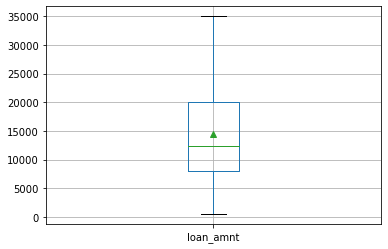

In [254]:
box15=data_rfe.boxplot(column="loan_amnt",showmeans=True)

In [ ]:
#for out_prncp

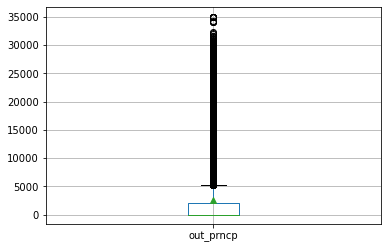

In [255]:
box16=data_rfe.boxplot(column="out_prncp",showmeans=True)

<AxesSubplot:xlabel='out_prncp', ylabel='Density'>

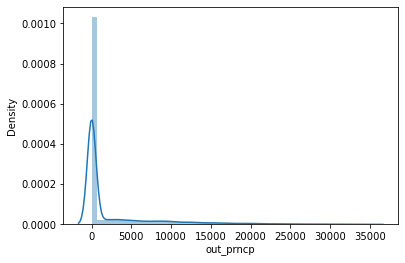

In [256]:
sns.distplot(data_rfe["out_prncp"])

In [257]:
iqr16=data_rfe.out_prncp.quantile(0.75)-data_rfe.out_prncp.quantile(0.25)
iqr16

2060.87

In [258]:
u16=data_rfe["out_prncp"].quantile(0.75)+3*iqr16
l16=data_rfe["out_prncp"].quantile(0.25)-3*iqr16
print(u16,l16)

8243.48 -6182.61


In [259]:
data_rfe.loc[data_rfe["out_prncp"]>8243.48,"out_prncp"]=8243.48

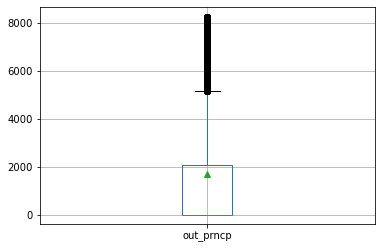

In [260]:
box16=data_rfe.boxplot(column="out_prncp",showmeans=True)

<AxesSubplot:xlabel='out_prncp', ylabel='Density'>

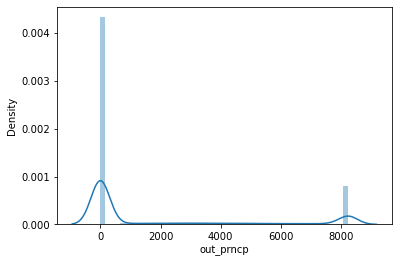

In [261]:
sns.distplot(data_rfe["out_prncp"])

In [ ]:
#for recoveries

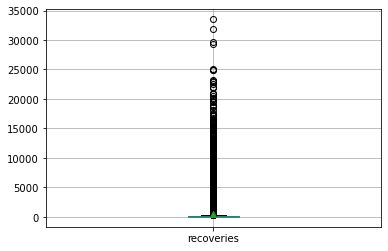

In [262]:
box17=data_rfe.boxplot(column="recoveries",showmeans=True)

<AxesSubplot:xlabel='recoveries', ylabel='Density'>

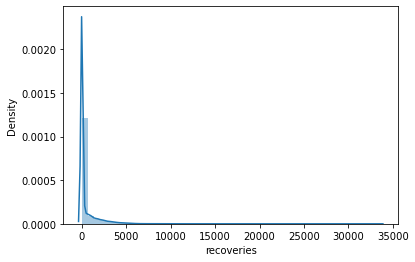

In [263]:
sns.distplot(data_rfe["recoveries"])

In [264]:
iqr17=data_rfe.recoveries.quantile(0.75)-data_rfe.recoveries.quantile(0.25)
iqr17

113.495

In [265]:
u17=data_rfe["recoveries"].quantile(0.75)+3*iqr17
l17=data_rfe["recoveries"].quantile(0.25)-3*iqr17
print(u17,l17)

453.98 -340.485


In [266]:
data_rfe.loc[data_rfe["recoveries"]>453.98,"recoveries"]=453.98

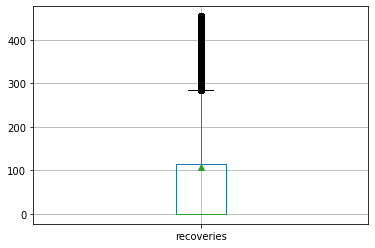

In [267]:
box17=data_rfe.boxplot(column="recoveries",showmeans=True)

<AxesSubplot:xlabel='recoveries', ylabel='Density'>

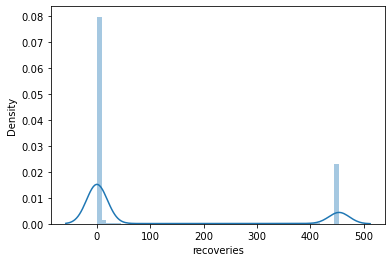

In [268]:
sns.distplot(data_rfe["recoveries"])

# skewness

In [276]:
data_rfe.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_title,annual_inc,title,...,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,total_rev_hi_lim,default_ind
id,1.000000,0.997361,0.052847,0.056951,0.066861,-0.036173,0.035050,0.027811,0.055301,-0.284075,...,0.446622,-0.216484,-0.201540,-0.169677,-0.157270,-0.223376,-0.118316,-0.054357,-0.029019,-0.222413
member_id,0.997361,1.000000,0.055319,0.059570,0.069877,-0.033739,0.037661,0.028275,0.056319,-0.285989,...,0.448668,-0.214420,-0.199261,-0.168198,-0.155021,-0.224350,-0.119236,-0.052382,-0.031500,-0.223380
loan_amnt,0.052847,0.055319,1.000000,0.998073,0.991858,0.209227,0.948271,-0.039266,0.493665,-0.117894,...,0.224184,0.659481,0.660251,0.478571,0.713136,0.071047,-0.015170,0.233238,0.380247,0.012625
funded_amnt,0.056951,0.059570,0.998073,1.000000,0.994232,0.210089,0.951139,-0.039346,0.492889,-0.119360,...,0.226799,0.659884,0.661115,0.479255,0.713087,0.069977,-0.015463,0.234171,0.379949,0.010964
funded_amnt_inv,0.066861,0.069877,0.991858,0.994232,1.000000,0.213109,0.944937,-0.038062,0.489326,-0.123710,...,0.231666,0.656305,0.665220,0.476192,0.711473,0.067391,-0.015775,0.234014,0.376169,0.006368
int_rate,-0.036173,-0.033739,0.209227,0.210089,0.213109,1.000000,0.195408,0.019318,-0.037015,0.033399,...,-0.079906,0.040899,0.048070,-0.145470,0.427389,0.218997,0.030107,-0.056796,-0.192474,0.275447
installment,0.035050,0.037661,0.948271,0.951139,0.944937,0.195408,1.000000,-0.035757,0.482816,-0.109808,...,0.172924,0.671620,0.673540,0.523103,0.643620,0.077922,-0.007379,0.260192,0.341529,0.017685
emp_title,0.027811,0.028275,-0.039266,-0.039346,-0.038062,0.019318,-0.035757,1.000000,-0.055757,0.130185,...,-0.008719,-0.062176,-0.060742,-0.059671,-0.041003,0.016008,-0.001890,-0.036909,-0.038536,0.036884
annual_inc,0.055301,0.056319,0.493665,0.492889,0.489326,-0.037015,0.482816,-0.055757,1.000000,-0.081019,...,0.142087,0.383033,0.385711,0.332767,0.303779,-0.025684,-0.017114,0.205112,0.341331,-0.119733
title,-0.284075,-0.285989,-0.117894,-0.119360,-0.123710,0.033399,-0.109808,0.130185,-0.081019,1.000000,...,-0.175377,-0.034778,-0.038390,-0.035060,-0.028583,0.089371,0.039778,-0.051657,-0.027422,0.113170


In [277]:
data_rfe.skew()

id                  1.331581
member_id           1.247434
loan_amnt           0.712793
funded_amnt         0.717280
funded_amnt_inv     0.716330
int_rate            0.213545
installment         0.936728
emp_title          -0.165903
annual_inc          1.498611
title               1.134186
dti                 0.118313
earliest_cr_line   -0.029265
revol_bal           1.576566
out_prncp           1.448148
total_pymnt         1.249715
total_pymnt_inv     1.489740
total_rec_prncp     1.870059
total_rec_int       1.643873
recoveries          1.239227
last_pymnt_d        0.364249
last_pymnt_amnt     1.434128
total_rev_hi_lim    0.704857
default_ind         0.000000
dtype: float64

In [ ]:
#ML models

# Logistic regression  EDA

In [299]:
#lg.fit(xrfe_train,yrfe_train)

In [300]:
#lg_rfe=lg.predict(xrfe_test)
#lg_rfe

In [301]:
#c_rfe=confusion_matrix(lg_rfe,yrfe_test)
#c_rfe

In [302]:
#Ac_rfe=c_rfe.diagonal().sum()/c_rfe.sum()*100  #99 % accuracy
#Ac_rfe

In [303]:
#print(classification_report(lg_rfe,yrfe_test)) 

# Naive bayes with  EDA

In [285]:
nb.fit(xrfe_train,yrfe_train)

MultinomialNB()

In [286]:
ni=nb.predict(xrfe_test)

In [287]:
n_rfe4=confusion_matrix(ni,yrfe_test)
n_rfe4

array([[10318,  1189],
       [ 2712, 11766]], dtype=int64)

In [288]:
acc_rfe4=n_rfe4.diagonal().sum()/n_rfe4.sum()*100
acc_rfe4

84.98749278429864

In [289]:
print(classification_report(ni,yrfe_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84     11507
           1       0.91      0.81      0.86     14478

    accuracy                           0.85     25985
   macro avg       0.85      0.85      0.85     25985
weighted avg       0.86      0.85      0.85     25985



# Decision tree with EDA

In [304]:
#dt.fit(xrfe_train,yrfe_train)

In [305]:
#dt_rfe1=dt.predict(xrfe_test)
#dt_rfe1

In [306]:
#c_rfe1=confusion_matrix(dt_rfe1,yrfe_test)
#c_rfe1

In [307]:
#Acc_rfe1=c_rfe1.diagonal().sum()/c_rfe1.sum()*100
#Acc_rfe1

In [308]:
#print(classification_report(dt_rfe1,yrfe_test))

# Random Forest with  EDA

In [309]:
#rf.fit(xrfe_train,yrfe_train)

In [310]:
#rf_rfe2=rf.predict(xrfe_test)
#rf_rfe2

In [311]:
#c_rfe2=confusion_matrix(rf_rfe2,yrfe_test)
#c_rfe2

In [312]:
#Acc_rfe2=c_rfe2.diagonal().sum()/c_rfe2.sum()*100
#Acc_rfe2

In [298]:
#print(classification_report(rf_rfe2,yrfe_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13105
           1       0.99      1.00      1.00     12880

    accuracy                           1.00     25985
   macro avg       1.00      1.00      1.00     25985
weighted avg       1.00      1.00      1.00     25985



In [ ]:
# from Model using class imbalanced technique ( Random Undersampling ) + EDA accuracy
#from Random Oversampling accuracy 
# 1.  Logistic Regression = 98%  accuracy
# 2.  Decision tree = 99% 
# 3.  Naive Bayes = 84% accuracy
# 4.  Random Forest = 99%accuracy

# Result =  Navie bayes with Random undersampling gives 86.97% accuracy.
precision    recall  f1-score   support

           0       0.80      0.93      0.86      7433
           1       0.94      0.82      0.88      9890

    accuracy                           0.87     17323
   macro avg       0.87      0.88      0.87     17323
weighted avg       0.88      0.87      0.87     17323